In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib

In [2]:
data = pd.read_csv("Datasets.csv")
data

,Brand,Dimension Leight (mm),Dimension Width (mm),Dimesion Thickness (mm),Weight (g),Battery Type,Battery Capacity (mAh),Screen Size (cm2),Resolution Height (pixels),Resolution Width (pixels),CPU (cores),Internal Storage (GB),RAM (GB),NFC Support,Price (USD)
0,Apple iPad mini (2024),195.4,134.8,6.3,293,1,5078,203.9,1488,2266,6,128,8,0,600.000
1,Apple iPhone 16 Pro Max,163.0,77.6,8.3,227,1,4685,115.6,1320,2868,6,256,8,1,1199.990
2,Apple iPhone 16 Pro,149.6,71.5,8.3,199,1,3582,96.4,1206,2622,6,128,8,1,999.990
3,Apple iPhone 16 Plus,160.9,77.8,7.8,199,1,4674,110.2,1290,2796,6,128,8,1,899.000
4,Apple iPhone 16,147.6,71.6,7.8,170,1,3561,91.7,1179,2556,6,128,8,1,829.990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,Realme GT5 Pro,161.7,75.1,9.2,218,1,5400,111.7,1264,2780,6,256,12,1,430.000
829,Realme Narzo 60x,165.7,76.0,7.9,190,1,5000,109.0,1080,2400,6,128,4,0,143.988
830,Realme GT5 240W,163.1,75.4,8.9,205,1,4600,109.2,1240,2772,6,1,24,1,470.000
831,Realme GT5,163.1,75.4,8.9,205,1,5240,109.2,1240,2772,6,256,12,1,380.000


In [3]:
data['Brand'] = data['Brand'].str.split().str[0].str.title()
data

,Brand,Dimension Leight (mm),Dimension Width (mm),Dimesion Thickness (mm),Weight (g),Battery Type,Battery Capacity (mAh),Screen Size (cm2),Resolution Height (pixels),Resolution Width (pixels),CPU (cores),Internal Storage (GB),RAM (GB),NFC Support,Price (USD)
0,Apple,195.4,134.8,6.3,293,1,5078,203.9,1488,2266,6,128,8,0,600.000
1,Apple,163.0,77.6,8.3,227,1,4685,115.6,1320,2868,6,256,8,1,1199.990
2,Apple,149.6,71.5,8.3,199,1,3582,96.4,1206,2622,6,128,8,1,999.990
3,Apple,160.9,77.8,7.8,199,1,4674,110.2,1290,2796,6,128,8,1,899.000
4,Apple,147.6,71.6,7.8,170,1,3561,91.7,1179,2556,6,128,8,1,829.990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,Realme,161.7,75.1,9.2,218,1,5400,111.7,1264,2780,6,256,12,1,430.000
829,Realme,165.7,76.0,7.9,190,1,5000,109.0,1080,2400,6,128,4,0,143.988
830,Realme,163.1,75.4,8.9,205,1,4600,109.2,1240,2772,6,1,24,1,470.000
831,Realme,163.1,75.4,8.9,205,1,5240,109.2,1240,2772,6,256,12,1,380.000


In [4]:
brands = data['Brand'].unique()
models = {}

Training model for brand: Apple
Final selected parameters: {'C': 10, 'cache_size': 200, 'coef0': 0.01, 'degree': 2, 'epsilon': 1, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Evaluation for brand Apple:
  Train MSE: 24181.14, Train R²: 0.82
  Test MSE: 24365.50, Test R²: 0.77
Model and scaler for Apple saved.


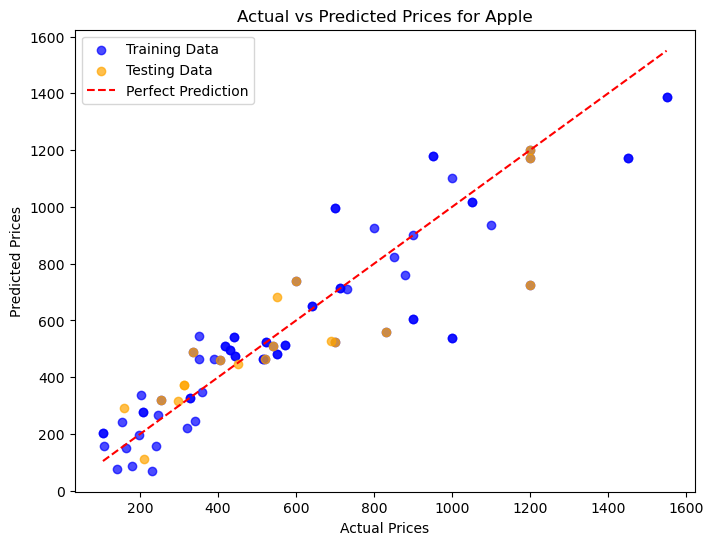

Training model for brand: Asus
Final selected parameters: {'C': 50, 'cache_size': 200, 'coef0': 0.01, 'degree': 2, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Evaluation for brand Asus:
  Train MSE: 89739.47, Train R²: 0.59
  Test MSE: 34117.16, Test R²: 0.65
Model and scaler for Asus saved.


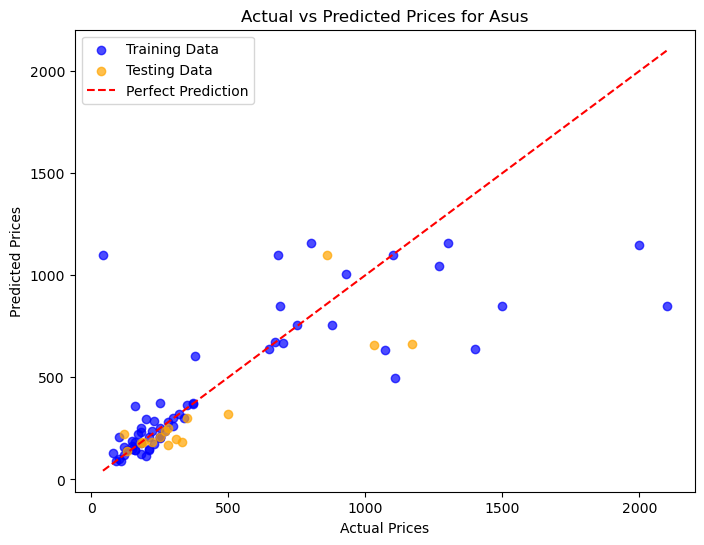

Training model for brand: Alcatel
Final selected parameters: {'C': 10, 'cache_size': 200, 'coef0': 0.01, 'degree': 2, 'epsilon': 0.5, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Evaluation for brand Alcatel:
  Train MSE: 1384.70, Train R²: 0.54
  Test MSE: 2777.93, Test R²: 0.34
Model and scaler for Alcatel saved.


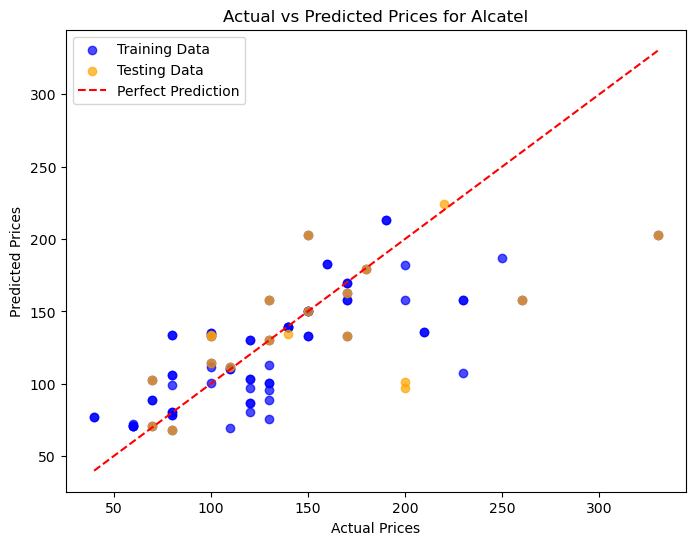

Training model for brand: Samsung
Final selected parameters: {'C': 500, 'cache_size': 200, 'coef0': 0.01, 'degree': 2, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Evaluation for brand Samsung:
  Train MSE: 7627.89, Train R²: 0.80
  Test MSE: 99637.16, Test R²: 0.57
Model and scaler for Samsung saved.


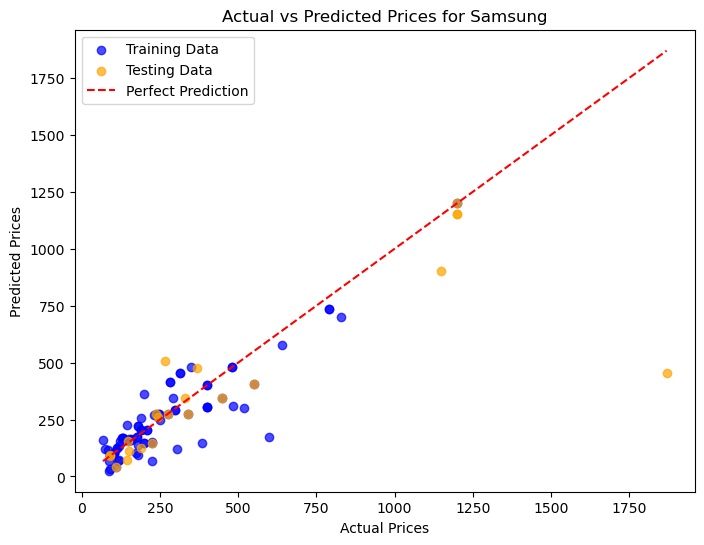

Training model for brand: Xiaomi
Final selected parameters: {'C': 500, 'cache_size': 200, 'coef0': 0.01, 'degree': 2, 'epsilon': 1, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Evaluation for brand Xiaomi:
  Train MSE: 8147.83, Train R²: 0.78
  Test MSE: 20976.56, Test R²: 0.71
Model and scaler for Xiaomi saved.


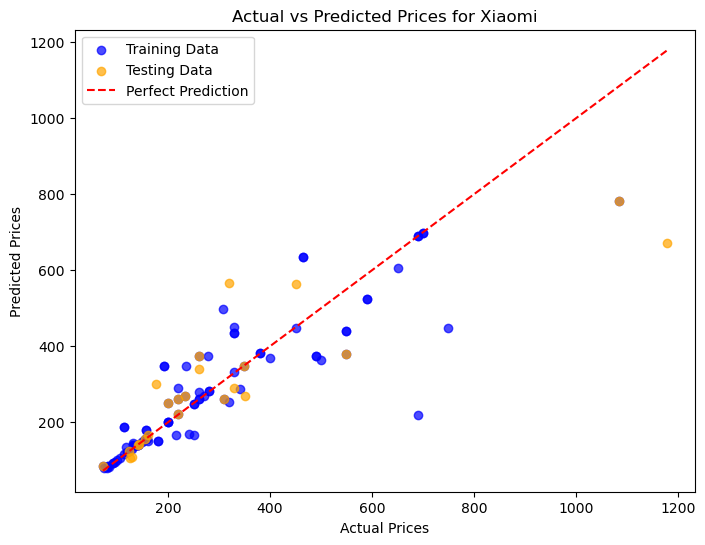

Training model for brand: Oppo
Final selected parameters: {'C': 500, 'cache_size': 200, 'coef0': 0.01, 'degree': 2, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Evaluation for brand Oppo:
  Train MSE: 2807.93, Train R²: 0.87
  Test MSE: 9845.91, Test R²: 0.67
Model and scaler for Oppo saved.


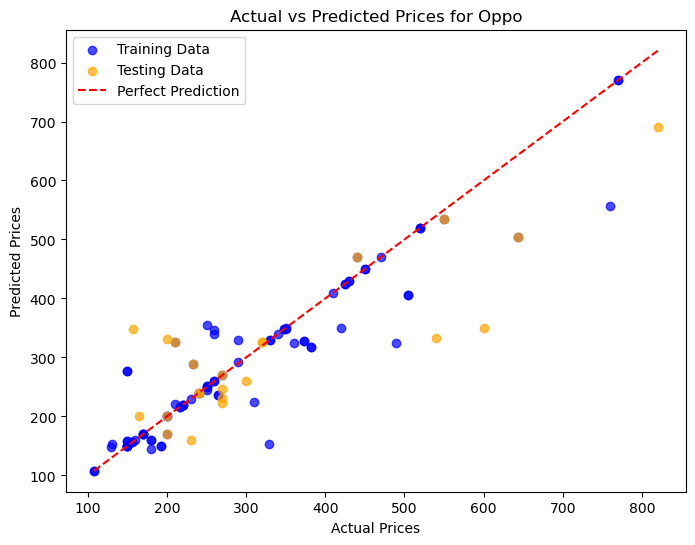

Training model for brand: Huawei
Final selected parameters: {'C': 500, 'cache_size': 200, 'coef0': 0.01, 'degree': 2, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Evaluation for brand Huawei:
  Train MSE: 26140.21, Train R²: 0.80
  Test MSE: 48298.22, Test R²: 0.58
Model and scaler for Huawei saved.


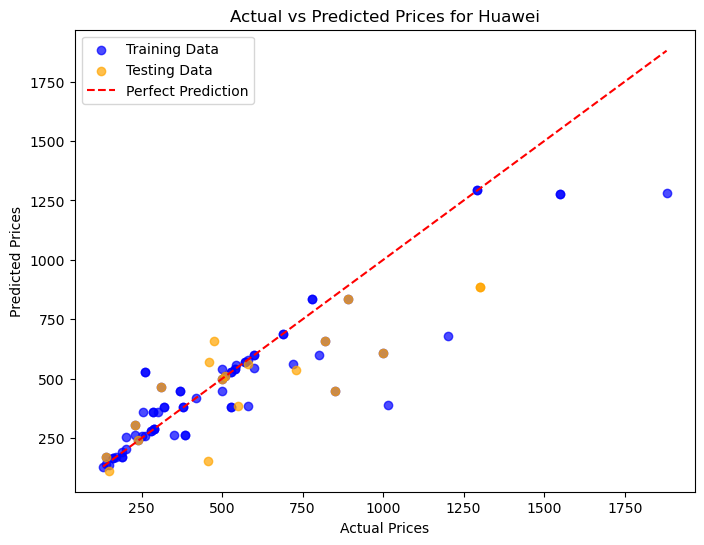

Training model for brand: Realme
Final selected parameters: {'C': 500, 'cache_size': 200, 'coef0': 0.01, 'degree': 2, 'epsilon': 1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Evaluation for brand Realme:
  Train MSE: 4206.09, Train R²: 0.78
  Test MSE: 8794.62, Test R²: 0.64
Model and scaler for Realme saved.


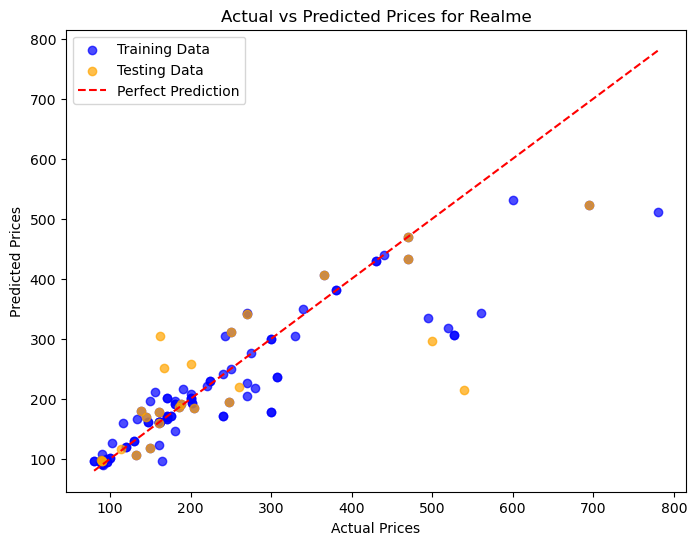

In [12]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

for brand in brands:
    print(f"Training model for brand: {brand}")
    
    brand_data = data[data['Brand'] == brand]
    X_brand = brand_data.drop(columns=['Brand', 'Price (USD)'])
    y_brand = brand_data['Price (USD)']
    
    scaler = StandardScaler()
    X_brand_scaled = scaler.fit_transform(X_brand)
    
    X_train, X_test, y_train, y_test = train_test_split(X_brand_scaled, y_brand, test_size=0.2, random_state=42)
    
    param_grid1 = {
        'kernel': ['poly', 'rbf', 'linear'],
        'C': [0.1, 1, 10, 50, 100, 150, 200, 500],
        'epsilon': [0.01, 0.05, 0.1, 0.5, 1],
        'cache_size': [200, 500],
    }
    
    param_grid2 = {
        'gamma': ['scale', 'auto'],
        'degree': [ 2, 3, 4],          
        'coef0': [0.01, 0.1, 1.0],
    }
    

   
    svr = SVR()

    grid_search1 = GridSearchCV(estimator=svr, param_grid=param_grid1, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
    grid_search1.fit(X_train, y_train)
    
    grid_search2 = GridSearchCV(estimator=grid_search1.best_estimator_, param_grid=param_grid2, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
    grid_search2.fit(X_train, y_train)

    best_svr = grid_search2.best_estimator_
    print(f"Final selected parameters: {best_svr.get_params()}")

    y_train_pred = best_svr.predict(X_train)
    y_test_pred = best_svr.predict(X_test)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f"Evaluation for brand {brand}:")
    print(f"  Train MSE: {train_mse:.2f}, Train R²: {train_r2:.2f}")
    print(f"  Test MSE: {test_mse:.2f}, Test R²: {test_r2:.2f}")
    model_filename = f'{brand}_svr_model.pkl'
    scaler_filename = f'{brand}_scaler.pkl'
    joblib.dump(best_svr, model_filename)
    joblib.dump(scaler, scaler_filename)
    print(f"Model and scaler for {brand} saved.")
    plt.figure(figsize=(8, 6))
    plt.scatter(y_train, y_train_pred, alpha=0.7, color='blue', label='Training Data')
    plt.scatter(y_test, y_test_pred, alpha=0.7, color='orange', label='Testing Data')
    plt.plot([y_brand.min(), y_brand.max()], [y_brand.min(), y_brand.max()], color='red', linestyle='--', label='Perfect Prediction')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'Actual vs Predicted Prices for {brand}')
    plt.legend()
    plt.show()

In [6]:

def predict_price(brand, input_specs):
    model_filename = f'{brand}_xgb_model.pkl'
    scaler_filename = f'{brand}_scaler.pkl'
    try:
        xgb_model = joblib.load(model_filename)
        scaler = joblib.load(scaler_filename)
        input_scaled = scaler.transform([input_specs])
        predicted_price = rf_model.predict(input_scaled)
        return predicted_price[0]
    except FileNotFoundError:
        print(f"No model available for the brand: {brand}")
        return None